<a href="https://colab.research.google.com/github/Maximum-prog/Git_py/blob/main/%D0%9F%D1%80%D0%BE%D0%BD%D0%B8%D0%BD_%D0%9C_%D0%92_%D0%94%D0%97_2_%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_2_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC_(Supervised_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Модуль 2. Обучение с учителем (Supervised learning)
## Прогноз доходности вложений в валюту



#### Представьтесь

In [1]:
import hashlib
# введите сюда ваш email, с которым вы регистрировались
print(hashlib.sha256(b"proshishe@gmail.com").hexdigest())
# после получения хеша реальный email можно удалить
def insert_my_email():
  hashed_email ="245548fe508c95a08d23a94d423aeecad3bbd16f807dd029c0a46105c54d522c"
  return hashed_email

d0b3f82ac7d89d3dbfb3fa90dc9d491b5c392542ea56d251aaced8f03854891b


# 1. Цель

В этом ноутбуке 4 задания на использование различных моделей обучения с учителем для прогнозирования цены USD с использованием исторических данных. Нам нужно понять, какие факторы оказывают наиболее сильное влияние, и, следовательно, включить как можно больше информации в модель.

Каждое задание оценивается в 2 балла:

* Задание выполнено корректно — 2 балла.
* Задание выполнено частично верно — 1 балл.
* Задание выполнено неверно — 0 баллов.
* Дополнительное задание  — 1 балл.

**Формат сдачи:**

Отправьте ссылку на измененный ноутбук (только **ссылку**, сам файл ipynb  присылать не нужно).


### **ВНИМАНИЕ!** Все ответы должны возвращаться через функции. Не удаляйте функции.



**Качество кода:** блокнот должен автоматически выполнять весь код при нажатии 	«Среда выполнения»/«Выполнить все».

# 2. Начало работы: установка библиотек и загрузка данных

## 2.1. Установка библиотек

In [2]:
!pip install statsmodels keras tensorflow requests gdown -q
!pip install git+https://github.com/pydata/pandas-datareader.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')
import time
import json
import requests
start = time.time()

In [4]:
# импортируем библиотеки ML
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
import statsmodels.api as sm

# импортируем библиотеки DL
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
# from keras.wrappers.scikit_learn import KerasRegressor

# сохранение и загрузка модели
from pickle import dump
from pickle import load

# модель работы с временными рядами
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# метрики
from sklearn.metrics import mean_squared_error

# работа с графиками
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


## 2.2. Загрузка набора данных

Мы будем использовать высокоуровневую библиотеку pandas datareader.

In [7]:
start_date = '2022-07-01'
end_date = '2023-07-01'
asset = 'USD000UTSTOM'
df = web.get_data_moex(asset, start=start_date,end=end_date)
df.shape

(254, 10)

## Задание 1. Подгрузить данные по активу

Вам необходимо выяснить, как называется аналогичный [инструмент](https://www.moex.com/ru/derivatives/optionsdesk.aspx?code=USD000UTSTOM) по валютной паре EUR/RUR и подгрузить данные за небольшой период (от 6 до 24 месяцев).  

In [52]:
def task1():
  # введите ваш код сюда
  global df
  start_date = '2022-09-01'
  end_date = '2023-02-01'
  asset = 'EUR_RUB__TOM'
  # введите ваш код сюда
  df = web.get_data_moex(asset, start=start_date,end=end_date)
  return {"start_date":start_date,
          "end_date":end_date,
          "asset":asset,
          "shape":df.shape
          }
task1()

{'start_date': '2022-09-01',
 'end_date': '2023-02-01',
 'asset': 'EUR_RUB__TOM',
 'shape': (108, 10)}

# 3. Разведочный анализ данных

## 3.1. Описательная статистика

Выведем описание характеристик:

In [53]:
df.describe()

,CLOSE,HIGH,LOW,OPEN,VOLRUR,WAPRICE
count,108.000000,108.000000,108.000000,108.000000,1.080000e+02,108.000000
mean,65.450486,66.143287,64.528935,65.337639,4.657090e+10,65.284196
std,6.708103,6.644249,6.646089,6.505232,1.780231e+10,6.660210
min,53.600000,56.057500,50.725000,54.035000,1.252693e+09,53.917900
25%,60.600000,61.249375,60.013125,60.700000,3.820518e+10,60.534950
50%,62.591250,63.036250,62.062500,62.646250,4.438362e+10,62.505600
75%,73.662500,74.747500,72.201875,73.553125,5.355524e+10,73.296475
max,76.560000,77.215000,76.010000,76.142500,1.512883e+11,76.253800


Удалим неиспользуемые колонки:

In [54]:
df = df.drop(['BOARDID','NUMTRADES','SECID','SHORTNAME'], axis=1)
df.head()

,CLOSE,HIGH,LOW,OPEN,VOLRUR,WAPRICE
TRADEDATE,,,,,,
2022-09-01,59.8950,60.5825,59.7200,60.5200,4.195605e+10,60.2472
2022-09-02,60.8350,60.9000,59.9625,59.9625,5.027601e+10,60.2339
2022-09-05,60.1250,60.8350,59.3550,60.8350,7.708076e+10,60.0925
2022-09-06,60.4150,62.1100,60.1225,60.1250,3.803669e+10,60.4445
2022-09-07,60.4125,61.0750,60.2500,60.3900,3.642867e+10,60.5171


## 3.2. Построение графиков

Далее давайте посмотрим на распределение данных за весь период, разбив данные на 50 ячеек (bins, bukets):

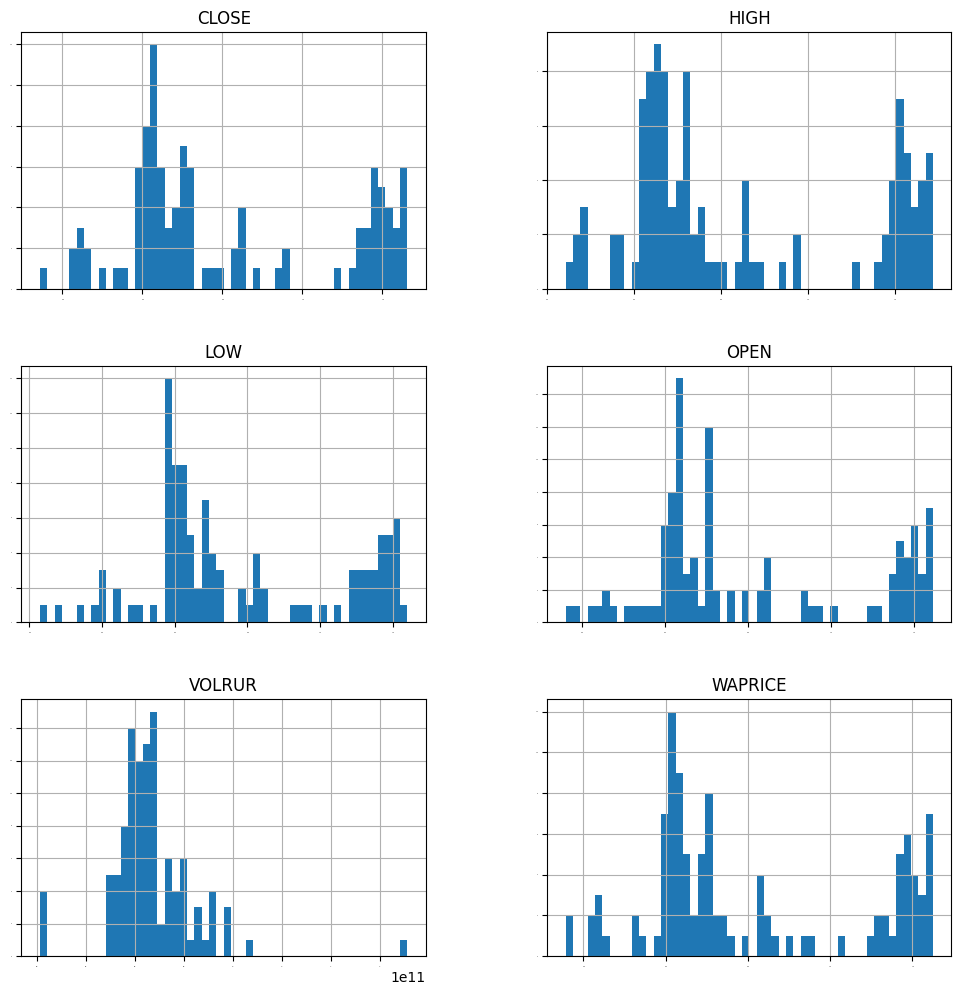

In [55]:
df.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

Приведенная выше гистограмма показывает распределение для каждой серии в отдельности. Далее давайте посмотрим на распределение плотности по той же шкале по оси Х:

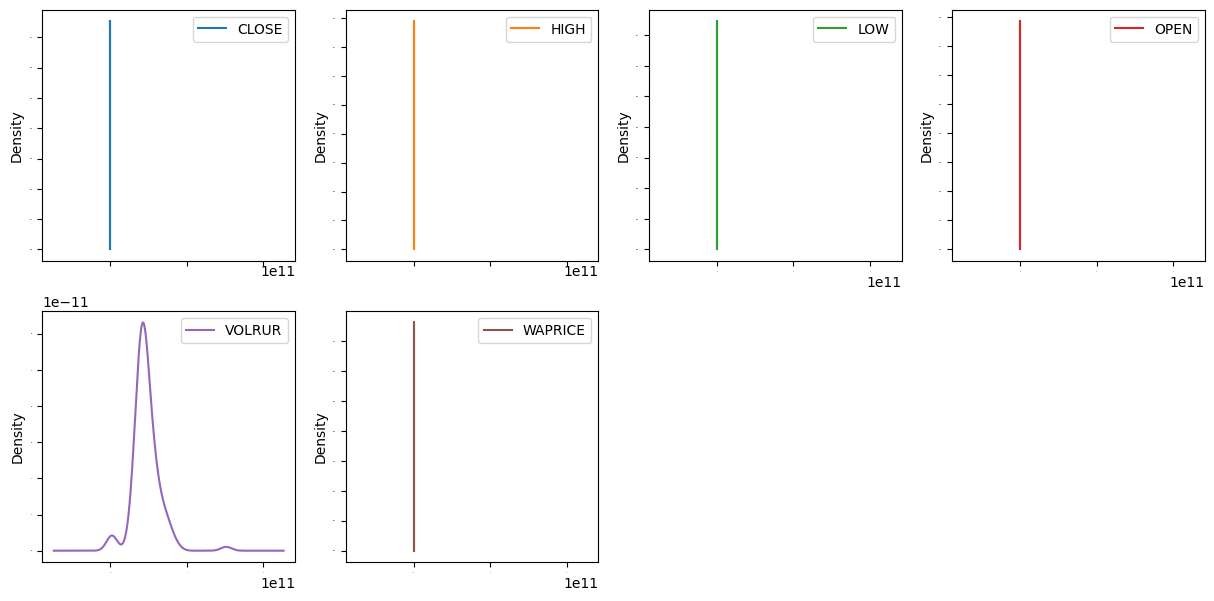

In [56]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

Чтобы получить представление о взаимозависимости данных, мы строим корреляционную матрицу:

<Axes: title={'center': 'Корреляционная матрица'}>

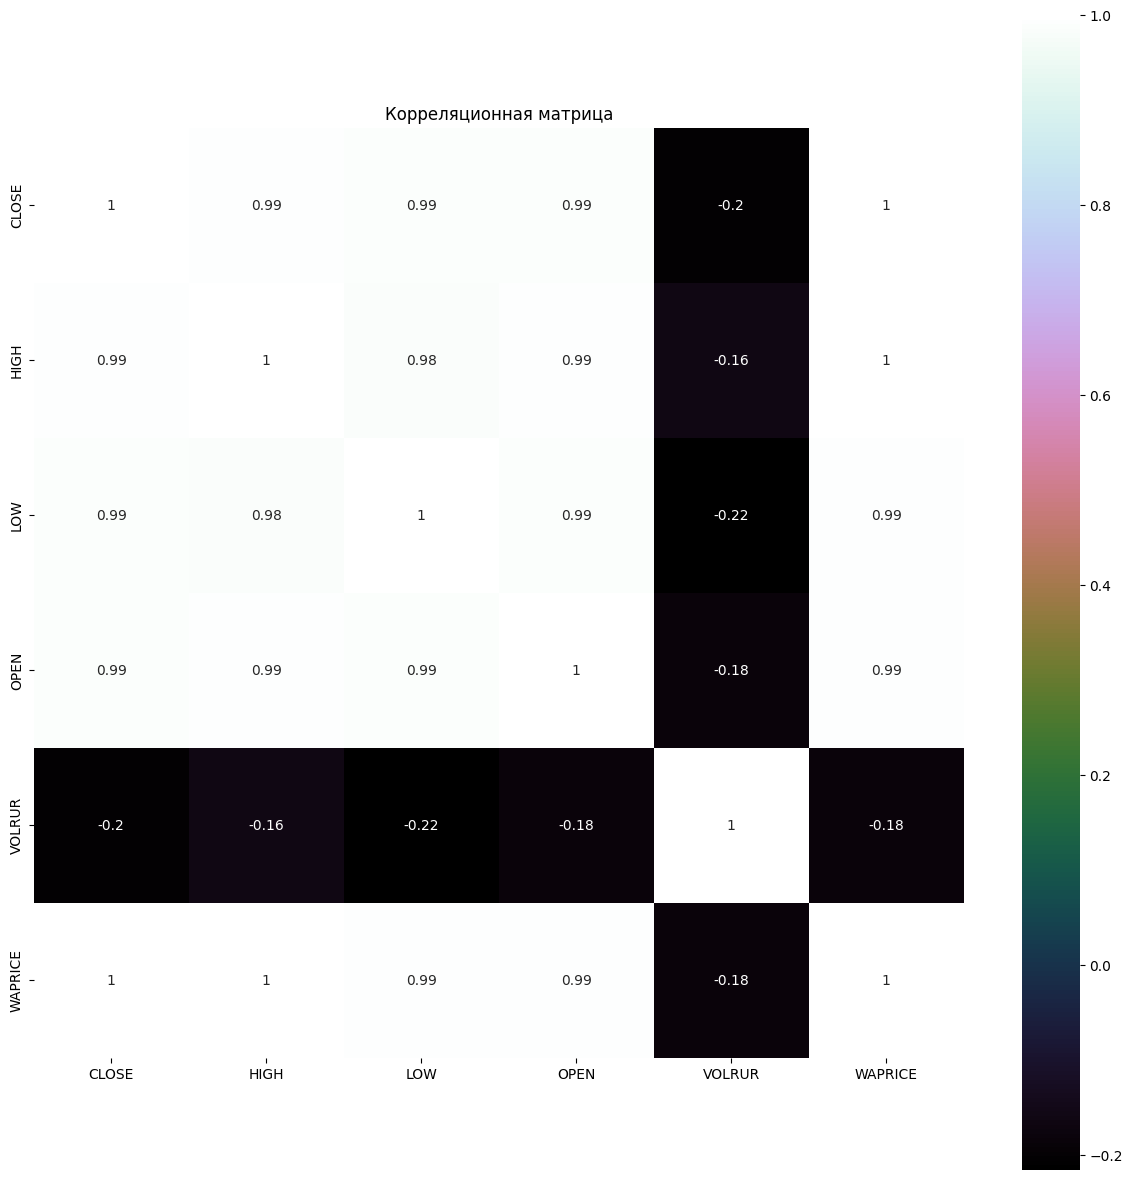

In [57]:
correlation = df.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Корреляционная матрица')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

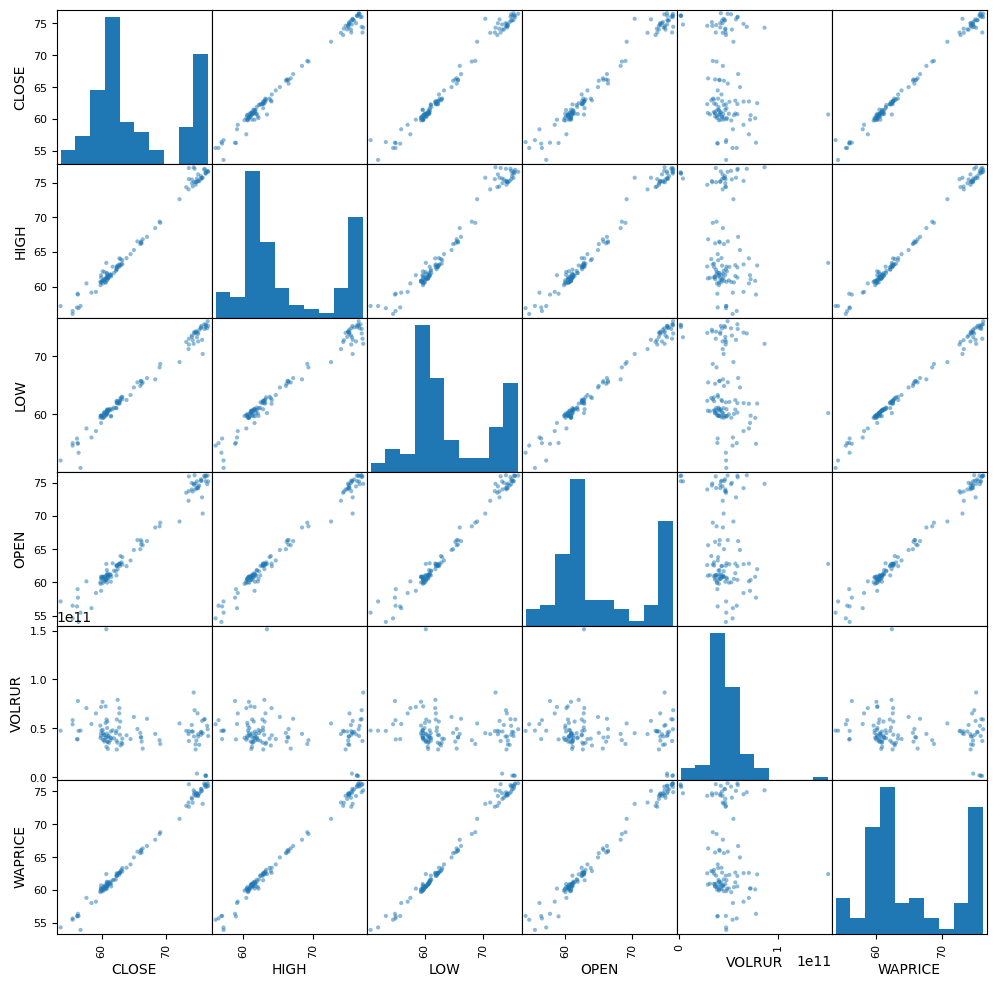

In [58]:
pyplot.figure(figsize=(15,15))
scatter_matrix(df,figsize=(12,12))
pyplot.show()

## 3.3. Анализ временных рядов

Далее мы рассмотрим сезонную составляющую наших временных рядов:

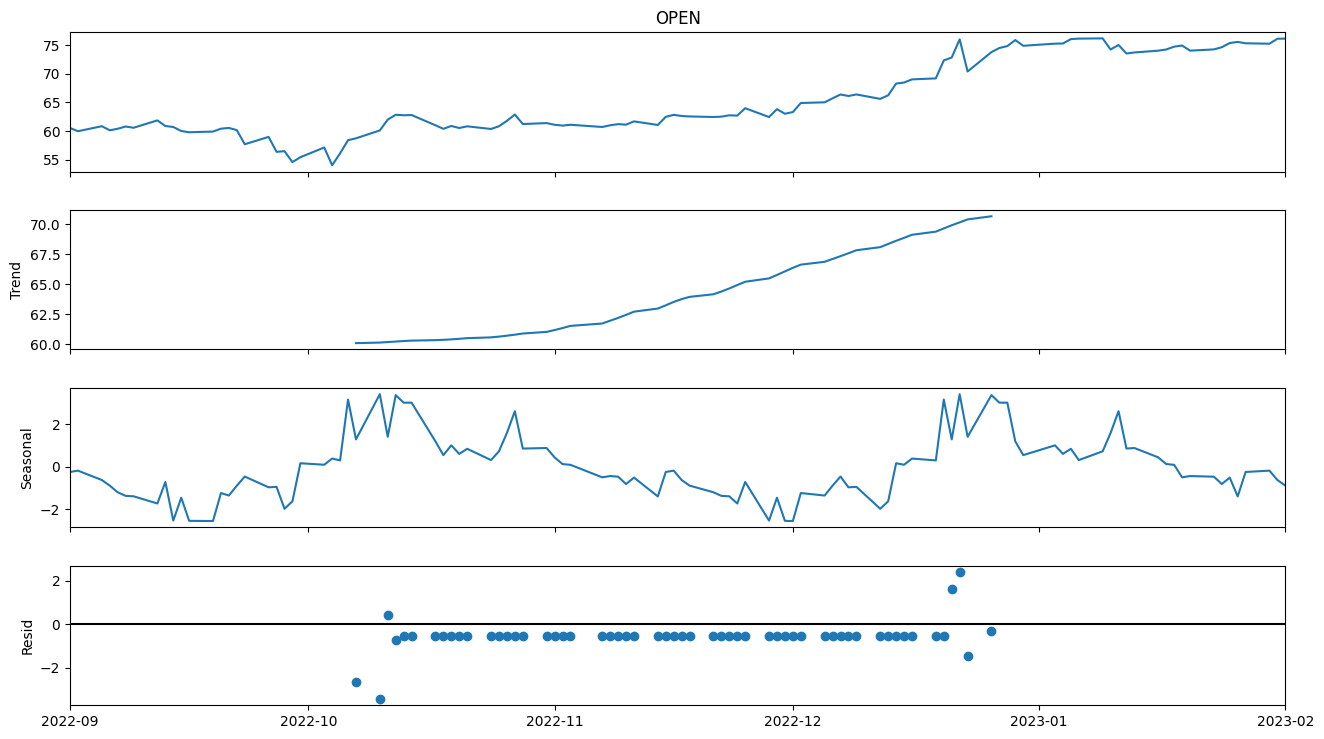

In [59]:
res = sm.tsa.seasonal_decompose(df["OPEN"],period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

Виден четкий повышающийся тренд. Рассмотрим данные тренда и сезонности:

In [16]:
res.trend.tail(100)

TRADEDATE
2023-02-06    72.185096
2023-02-07    72.260841
2023-02-08    72.350962
2023-02-09    72.451490
2023-02-10    72.546755
                ...    
2023-06-26          NaN
2023-06-27          NaN
2023-06-28          NaN
2023-06-29          NaN
2023-06-30          NaN
Name: trend, Length: 100, dtype: float64

In [17]:
res.seasonal.tail(100)

TRADEDATE
2023-02-06   -0.290023
2023-02-07   -0.128112
2023-02-08   -0.573773
2023-02-09   -0.330882
2023-02-10   -0.210089
                ...   
2023-06-26    0.035614
2023-06-27    0.037669
2023-06-28   -0.108701
2023-06-29   -0.068617
2023-06-30   -0.221021
Name: seasonal, Length: 100, dtype: float64

## Задание 2. Анализ тренда и сезонности

Проведите аналогичный анализ тренда и сезонности по валютной паре EUR/RUR.

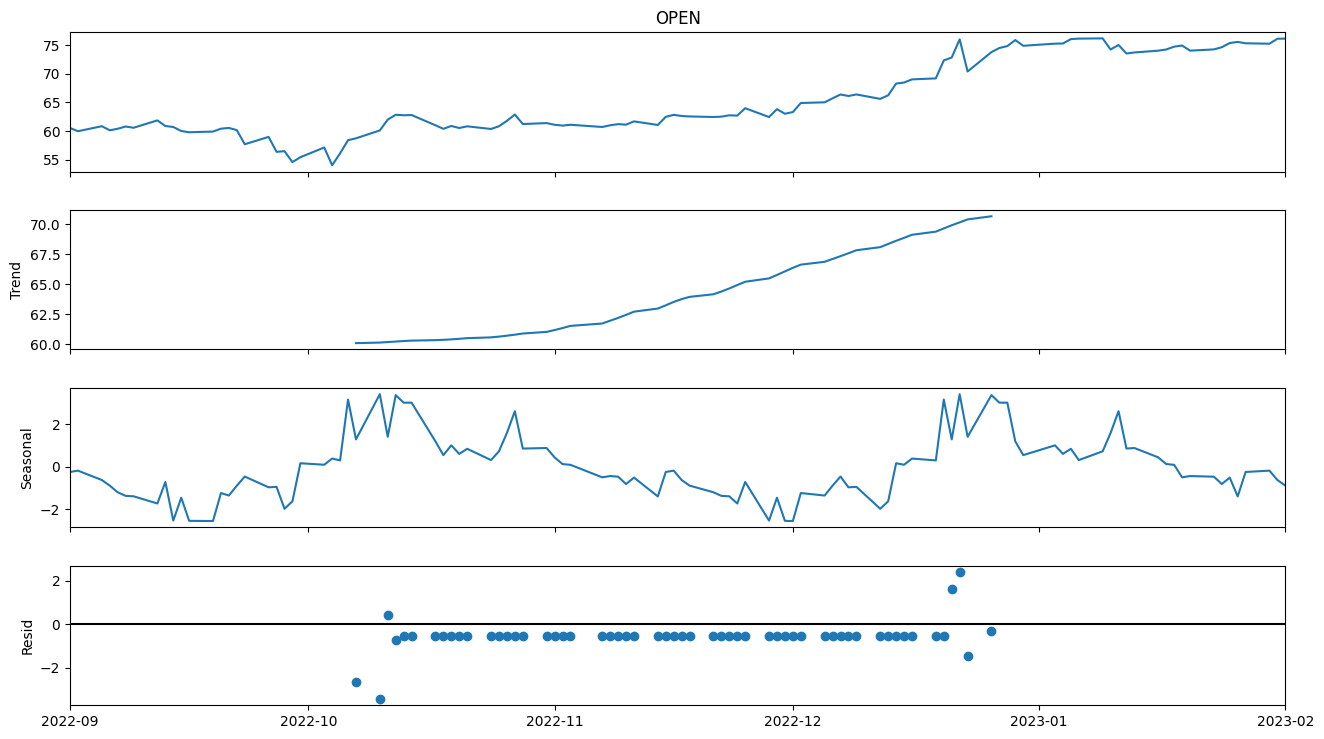

'nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,60.087548076923085,60.13377403846153,60.17834134615384,60.21860576923077,60.26149038461538,60.29771634615385,60.33512019230769,60.36399038461539,60.40175480769231,60.44822115384616,60.50141826923077,60.5689423076923,60.632620192307684,60.7083173076923,60.79430288461538,60.89060096153845,61.027307692307694,61.17920673076924,61.34389423076923,61.52771634615385,61.72735576923077,61.962764423076926,62.1951201923077,62.44788461538462,62.717307692307706,62.97656250000001,63.245649038461536,63.533725961538465,63.76701923076923,63.95264423076924,64.17036057692307,64.39865384615385,64.65704326923077,64.93901442307693,65.21612980769231,65.49569711538462,65.78350961538463,66.08112980769232,66.37980769230771,66.64663461538463,66.88271634615384,67.11742788461538,67.35401442307692,67.59653846153846,67.84822115384614,68.10665865384617,68.37406250000001,68.63567307692307,68.88598557692308,69.140961

In [60]:
def task2():
  global df
  res = sm.tsa.seasonal_decompose(df["OPEN"],period=52)
  fig = res.plot()
  fig.set_figheight(8)
  fig.set_figwidth(15)
  pyplot.show()
  trend = res.trend.values.tolist()
  seasonal = res.trend.values.tolist()
  # введите ваш код сюда
  return ",".join([str(i) for i in trend]+[str(i) for i in seasonal])
task2()

# 4. Процесс оценки эффективности алгоритмов и моделей

## 4.1. Показатели/метрики/оценки и разделение набора данных на обучающий и тестовый

Далее мы начинаем с разделения наших данных на обучающие и тестовые наборы. Если мы собираемся использовать модели временных рядов, мы должны разделить данные также на непрерывные ряды.

In [61]:
Y = df[['WAPRICE']]#средневзвешенная цена
X = df[['VOLRUR']]#объем
X.head()

,VOLRUR
TRADEDATE,
2022-09-01,4.195605e+10
2022-09-02,5.027601e+10
2022-09-05,7.708076e+10
2022-09-06,3.803669e+10
2022-09-07,3.642867e+10


In [62]:
validation_size = 0.2

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

## 4.2. Варианты проверки модели и показатели оценки

In [63]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

## 4.3. Сравнение моделей

### 4.3.1. Модели машинного обучения scikit-learn

##### Регрессия и алгоритмы решающих деревьев:

In [64]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

##### Нейросетевой алгоритм (многослойный перцептрон):

In [ ]:
# models.append(('MLP', MLPRegressor()))

##### Ансамблевые модели:

In [68]:
# бустинг
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# бэггинг
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

После того как мы выбрали все модели, мы перебираем каждую из них. Сначала запускаем K-кратный анализ. Затем запускаем модель на всем наборе данных для обучения и тестирования.

In [69]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)

    ## K Fold analysis:

    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    # преобразуем среднеквадратичную ошибку в положительную: чем меньше, тем лучше
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)


    # обучение
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)

    # проверка
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)

    msg = "Алгортим %s:\t среднее=%f\t ст.отк=(%f)\t обуч=%f\tпровер=%f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

Алгортим LR:	 среднее=26.492464	 ст.отк=(11.592958)	 обуч=25.451772	провер=146.195482
Алгортим LASSO:	 среднее=26.492464	 ст.отк=(11.592958)	 обуч=25.451772	провер=146.195482
Алгортим EN:	 среднее=26.492464	 ст.отк=(11.592958)	 обуч=25.451772	провер=146.195482
Алгортим KNN:	 среднее=32.496596	 ст.отк=(12.571742)	 обуч=20.521583	провер=152.934041
Алгортим CART:	 среднее=40.962856	 ст.отк=(21.714325)	 обуч=0.000000	провер=173.264155
Алгортим SVR:	 среднее=28.377775	 ст.отк=(13.752361)	 обуч=27.511641	провер=182.943482
Алгортим ABR:	 среднее=29.445050	 ст.отк=(9.448758)	 обуч=19.649348	провер=117.775290
Алгортим GBR:	 среднее=32.226684	 ст.отк=(15.114260)	 обуч=2.870019	провер=160.820207
Алгортим RFR:	 среднее=34.112514	 ст.отк=(14.754101)	 обуч=4.249462	провер=162.407793
Алгортим ETR:	 среднее=37.248562	 ст.отк=(17.823674)	 обуч=0.000000	провер=170.541164


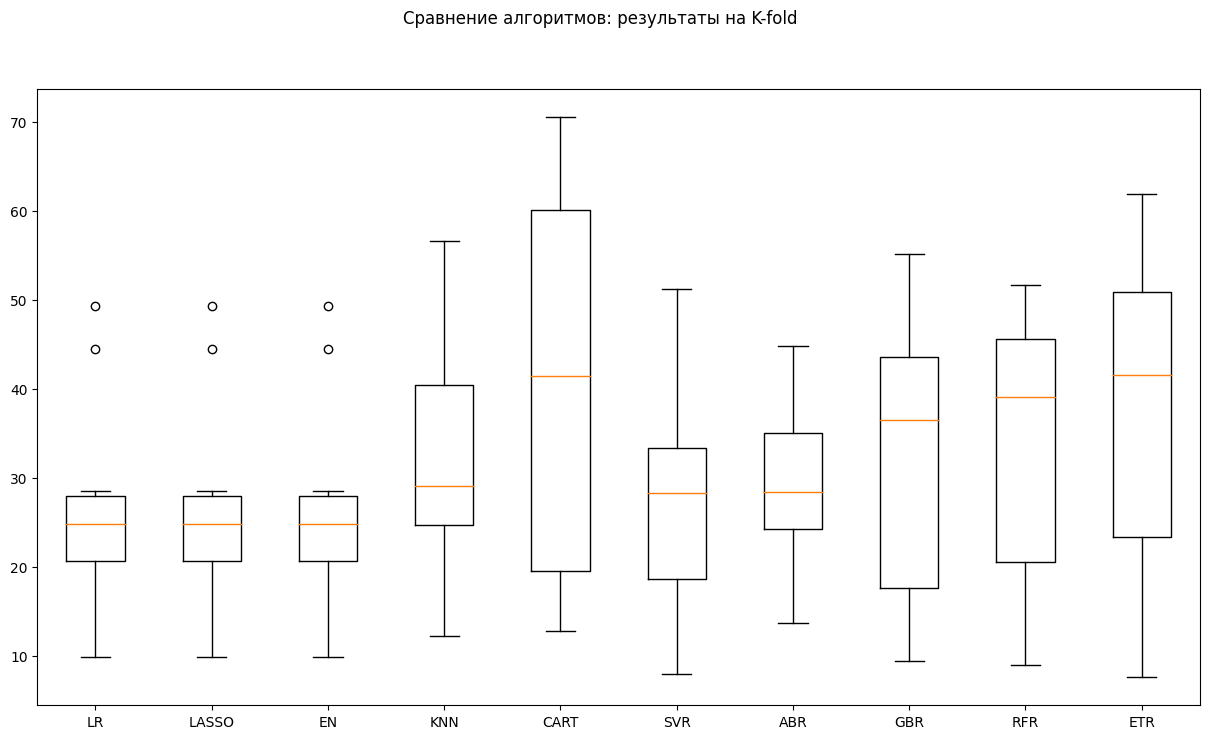

In [71]:
fig = pyplot.figure()
fig.suptitle('Сравнение алгоритмов: результаты на K-fold')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

Мы видим, что линейная регрессия и регуляризованная регрессия, включая регрессию Лассо (LASSO) и эластичную сеть (EN), справляются хорошо.

#### Ошибки на обучающем и тестовом наборе данных:

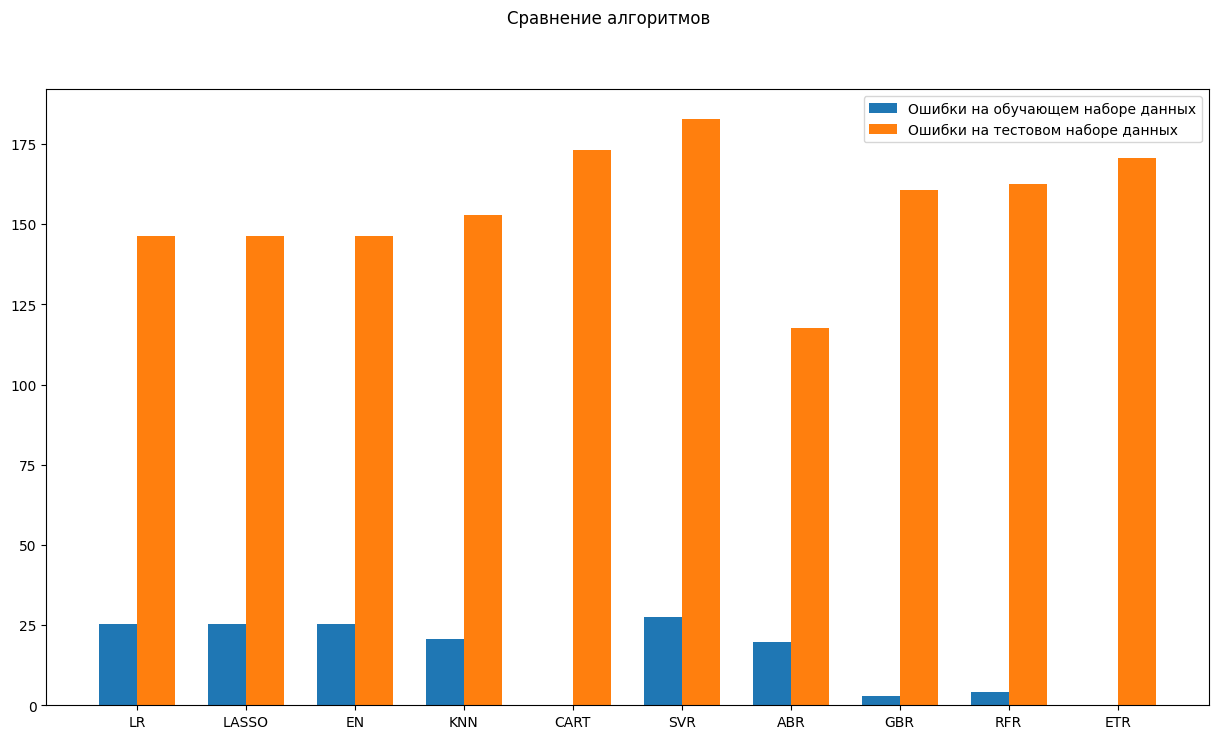

In [73]:
# сравнение алгоритмов
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Сравнение алгоритмов')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Ошибки на обучающем наборе данных')
pyplot.bar(ind + width/2, test_results, width=width, label='Ошибки на тестовом наборе данных')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

Рассматривая ошибки на наборах данных для обучения и тестирования, мы по-прежнему видим лучшую производительность линейных моделей. Некоторые алгоритмы, такие как регрессор дерева решений (CART), перегружают данные
обучения и приводят к очень высокой ошибке в тестовом наборе, и этих моделей
следует избегать.

Ансамблевые модели, такие как регрессия с повышением градиента (GBR) и
случайный лес (RFR), имеют низкое смещение, но высокую дисперсию.



### Задание 3. Обоснование выбора модели

In [74]:
def task3():
  """
  выберите любую модель из списка LR,LASSO,EN,KNN,CART,SVR,ABR,GBR,RFR,ETR
  и опишите ее сильные и слабые стороны
  """
  # введите ваш код сюда
  description_of_algorithm="AdaBoostRegressor (ABR) Наиболее интересной моделью после асамблирования оказалась ABR. Силььные стороны заключаются в том, что она: 1)дает высокую точность и наименьшее ст.отклоение из всех моделей, 2) может рабоать со сложными нелинейными зависисмостями в данных, т.к. коррекляция между WAPRICE и VOLRUR статестичиски не значима= -0,1, 3) использует автоматическое масщтабирование объектов, автоматически настраивает свои параметры в соответствии с данными на основе фактической производительности в текущей итерации. AdaBoost минимизирует функцию потерь, связанную с любой ошибкой классификации, и лучше всего подходит для слабых учащихся. При этом недостатуом модели является то, что она инимизирует экспоненциальную функцию потерь, которая может сделать алгоритм чувствительным к выбросам и шуму. На данном датасете шума и выбросов не было, поэтому она показала хороший резултат. Такеже модель плохо работает с несбалансированными данными. Кроме того, если модель слишком сложнаа и если если количество итераций (n_estimators) слишком велико модеь склонна к переобучениею.  "

  # введите ваш код сюда
  return description_of_algorithm
task3()

'AdaBoostRegressor (ABR) Наиболее интересной моделью после асамблирования оказалась ABR. Силььные стороны заключаются в том, что она: 1)дает высокую точность и наименьшее ст.отклоение из всех моделей, 2) может рабоать со сложными нелинейными зависисмостями в данных, т.к. коррекляция между WAPRICE и VOLRUR статестичиски не значима= -0,1, 3) использует автоматическое масщтабирование объектов, автоматически настраивает свои параметры в соответствии с данными на основе фактической производительности в текущей итерации. AdaBoost минимизирует функцию потерь, связанную с любой ошибкой классификации, и лучше всего подходит для слабых учащихся. При этом недостатуом модели является то, что она инимизирует экспоненциальную функцию потерь, которая может сделать алгоритм чувствительным к выбросам и шуму. На данном датасете шума и выбросов не было, поэтому она показала хороший резултат. Такеже модель плохо работает с несбалансированными данными. Кроме того, если модель слишком сложнаа и если если ко

### 4.3.2. Модели на основе временных рядов ARIMA и LSTM

Давайте сначала подготовим набор данных для моделей ARIMA,
используя только коррелированные переменные в качестве экзогенных переменных.

### Модель ARIMA

In [75]:
tr_len = len(X_train)
te_len = len(X_test)
to_len = len (X)
print(len(X_train), len(Y_train))

86 86


In [76]:
modelARIMA=ARIMA(endog=Y_train,exog=X_train,order=[1,0,0])
model_fit = modelARIMA.fit()

In [77]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

146.19548180790855

###  Модель LSTM

In [78]:
seq_len = 2 # длина последовательности LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]


In [79]:
# нейросеть LSTM
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
    # последовательная модель
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    # при необходимости можно добавить большее количество ячеек
    model.add(Dense(1))
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=330, batch_size=72, verbose=0, shuffle=False)

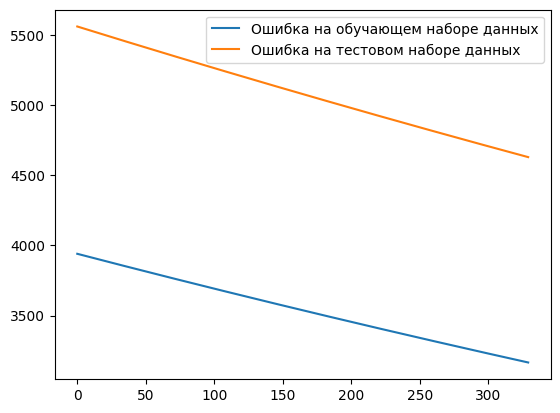

In [80]:
# визуальный график, позволяющий проверить, уменьшается ли функция ошибки
pyplot.plot(LSTMModel_fit.history['loss'], label='Ошибка на обучающем наборе данных')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='Ошибка на тестовом наборе данных')
pyplot.legend()
pyplot.show()

In [81]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

1/1 [==============================] - 0s 20ms/step


#### Добавим модели временных рядов для сравнения с другими моделями:

In [82]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)

names.append("ARIMA")
names.append("LSTM")

## Общее сравнение всех алгоритмов (включая алгоритмы временных рядов)

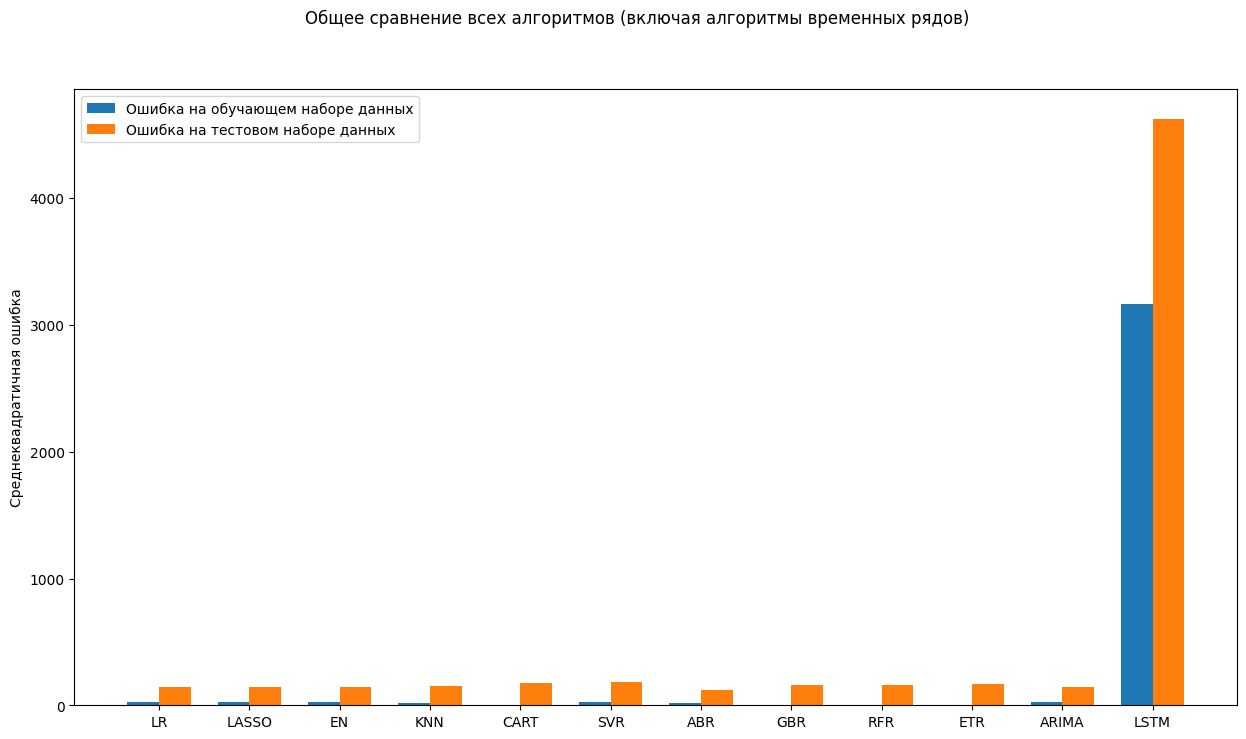

In [83]:
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Общее сравнение всех алгоритмов (включая алгоритмы временных рядов)')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Ошибка на обучающем наборе данных')
pyplot.bar(ind + width/2, test_results, width=width, label='Ошибка на тестовом наборе данных')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Среднеквадратичная ошибка')
pyplot.show()

Взглянув на приведенную выше диаграмму, мы видим, что модель ARIMA, основанная на временных рядах, сопоставима с моделями линейной контролируемой регрессии, такими как линейная регрессия (LR), регрессия Лассо (LASSO) и эластичная сеть (EN). В первую очередь это может быть связано с сильной линейной
зависимостью, как обсуждалось ранее. Модель LSTM работает нормально, однако
модель ARIMA превосходит модель LSTM в тестовом наборе. Следовательно, мы выбираем модель ARIMA для настройки модели.

# 5. Настройка модели и подбор гиперпараметров (Grid Search)

Как показано на диаграмме выше, модель ARIMA является одной из лучших, поэтому мы выполняем настройку модели ARIMA. Параметры модели ARIMA по умолчанию равны [1,0,0].

Мы выполняем поиск по сетке с различными комбинациями p, d и q в порядке модели ARIMA.

In [84]:
# поиск по сетке модели ARIMA
# измените p, d и q и проверьте наилучший результат

# оцените модель ARIMA для заданного порядка (p,d, q)
# предполагая, что данные поезда и тестирования уже определены ранее
def evaluate_arima_model(arima_order):
    #predicted = list()
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error

# оцените комбинации значений p, d и q для модели ARIMA
def evaluate_models(p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s Среднеквадратичная ошибка=%.7f' % (order,mse))
                except:
                    continue
    print('Лучшая ARIMA %s Среднеквадратичная ошибка=%.7f' % (best_cfg, best_score))

# оцениваем параметры
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)

Лучшая ARIMA None Среднеквадратичная ошибка=inf


## Задание 4. Толкование кода

In [85]:
def task4():
  """
  в приведенном выше фрагменте кода использован метод поиска
  гиперпараметров по сетке модели (так называемый GridSearch).
  Опишите, как вы понимаете назначение строк кода
      for p in p_values:
        for d in d_values:
            for q in q_values:

  """
  # введите ваш код сюда
  description_of_grid_search="p, d, q содержат списки значений, которые необходимо проверить для каждого параметра. Соответсвенно с помощью оператора for запускаются циклы p in p_values, d in d_values, q in q_values, которые перебирают все значения параметров p, d, q соответсвенно. Таким образом, этот код позволяют оценить модель ARIMA для всех комбинаций значений параметров (p, d, q), указанных в p_values, d_values, q_values, а потом уже выбрать наилучшую комбинацию параметров на основе среднеквадратичной ошибки (MSE)"

  # введите ваш код сюда
  return description_of_grid_search
task4()

'p, d, q содержат списки значений, которые необходимо проверить для каждого параметра. Соответсвенно с помощью оператора for запускаются циклы p in p_values, d in d_values, q in q_values, которые перебирают все значения параметров p, d, q соответсвенно. Таким образом, этот код позволяют оценить модель ARIMA для всех комбинаций значений параметров (p, d, q), указанных в p_values, d_values, q_values, а потом уже выбрать наилучшую комбинацию параметров на основе среднеквадратичной ошибки (MSE)'

# 6. Принимаем окончательное решение по модели

## 6.1. Результаты на тестовом наборе данных

In [86]:
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train,order=[2,0,1])
model_fit_tuned = modelARIMA_tuned.fit()

In [87]:
# оцениваем точность на тестовом наборе данных
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

146.19548180790855


После настройки модели и выбора лучшей модели ARIMA или порядка 2, 0 и 1 мы выбираем эту модель и можем ее использовать для целей моделирования.

## 6.2. Сохранение модели для дальнейшего использования

In [88]:
from pickle import dump
from pickle import load

# сохранить на диск
filename = 'finalized_model.sav'
dump(model_fit_tuned, open(filename, 'wb'))

## Задание 5. Выполните сохранение модели на диск

In [89]:
def task5():
  # введите ваш код сюда
  filename = 'finalized_model.sav'
  dump(model_fit_tuned, open(filename, 'wb'))
  # введите ваш код сюда
  result = !ls
  return filename in ",".join(result)
task5()

True

### Выводы

Мы можем сделать вывод, что простые модели — линейная регрессия, регуляризованная регрессия (например, Лассо и эластичная сеть) — наряду с моделью временных рядов, такой как ARIMA, являются многообещающими подходами для решения задачи прогнозирования цен на валюту. Эти модели могут позволить финансистам моделировать временные зависимости. Общий подход может помочь нам справиться с переобучением и недообучением, которые являются одними из ключевых проблем в задаче прогнозирования в финансах. Необходимо отметить, что дополнительно мы можем использовать расширенный набор индикаторов, таких как объем торгов, технические индикаторы (RSI, ...) или новостные данные, что дает лучшие результаты.

В итоге сегодня мы создали простую регрессию и смоделировали временные ряды, что позволяет нам выполнять разные задачи прогнозирования цен активов с использованием исторических данных.

In [90]:
%%capture
result = requests.post(str('https://autotest-egister.amvera.io/submission_attempt/'),
data=json.dumps({
    "start":str(start),
    "task1":str(task1())[:100],
    "task2":str(task2())[:100],
    "task3":str(task3())[:100],
    "task4":str(task4())[:100],
    "task5":str(task5())[:100],
    "id":insert_my_email(),
    "stop":str(time.time()),
    "duration":str(time.time()-start),
    "homework":2
})).text

In [91]:
print(result)

"OK"
